Objective:
To develop a robust classification model that predicts the triage grade of cybersecurity incidents—categorizing them as True Positive (TP), Benign Positive (BP), or False Positive (FP)—based on historical data and customer responses.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Preprocessing:

In [2]:
train_data=pd.read_csv(r"C:\Users\Shiva\OneDrive\Desktop\cardekho\new_train_sample\new_train_sample.csv")

In [3]:
train_data

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,3272416,103079215470,142,93987,15739,2024-06-10T10:25:17.000Z,112,7836,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4758414,6701254,1683627184337,36,1001,257479,2024-06-11T19:30:52.000Z,2,2,CommandAndControl,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4758415,5665090,1597727836318,851,31194,1518250,2024-06-09T04:27:41.000Z,1,1,InitialAccess,T1566.002,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4758416,1421470,137438957239,12,2419,1203,2024-05-21T23:01:11.000Z,16,1334,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  int64  
 2   OrgId               int64  
 3   IncidentId          int64  
 4   AlertId             int64  
 5   Timestamp           object 
 6   DetectorId          int64  
 7   AlertTitle          int64  
 8   Category            object 
 9   MitreTechniques     object 
 10  IncidentGrade       object 
 11  ActionGrouped       object 
 12  ActionGranular      object 
 13  EntityType          object 
 14  EvidenceRole        object 
 15  DeviceId            int64  
 16  Sha256              int64  
 17  IpAddress           int64  
 18  Url                 int64  
 19  AccountSid          int64  
 20  AccountUpn          int64  
 21  AccountObjectId     int64  
 22  AccountName         int64  
 23  DeviceName          int64  
 24  NetworkMessageId    int6

In [5]:
train_data.count()

Unnamed: 0            4758418
Id                    4758418
OrgId                 4758418
IncidentId            4758418
AlertId               4758418
Timestamp             4758418
DetectorId            4758418
AlertTitle            4758418
Category              4758418
MitreTechniques       2025282
IncidentGrade         4732643
ActionGrouped           28213
ActionGranular          28213
EntityType            4758418
EvidenceRole          4758418
DeviceId              4758418
Sha256                4758418
IpAddress             4758418
Url                   4758418
AccountSid            4758418
AccountUpn            4758418
AccountObjectId       4758418
AccountName           4758418
DeviceName            4758418
NetworkMessageId      4758418
EmailClusterId          48177
RegistryKey           4758418
RegistryValueName     4758418
RegistryValueData     4758418
ApplicationId         4758418
ApplicationName       4758418
OAuthApplicationId    4758418
ThreatFamily            37380
FileName  

In [6]:
train_data.isnull().sum()

Unnamed: 0                  0
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2733136
IncidentGrade           25775
ActionGrouped         4730205
ActionGranular        4730205
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4710241
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4721038
FileName  

In [7]:
train_data.drop(columns=['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId', 
                       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict'], 
               axis=1, inplace=True)

In [8]:
train_data.isnull().sum()

Unnamed: 0                0
Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         25775
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                

In [9]:
train_data['IncidentGrade']=train_data['IncidentGrade'].fillna(train_data['IncidentGrade'].mode()[0])

In [10]:
train_data.isnull().sum()

Unnamed: 0            0
Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [11]:
train_data.duplicated().sum()

np.int64(0)

In [12]:
train_data['Timestamp']=pd.to_datetime(train_data['Timestamp'])
train_data['Year'] = train_data['Timestamp'].dt.year
train_data['Month'] = train_data['Timestamp'].dt.month
train_data['Day'] = train_data['Timestamp'].dt.day
train_data['Hour'] = train_data['Timestamp'].dt.hour

In [13]:
print(train_data.columns)

Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp',
       'DetectorId', 'AlertTitle', 'Category', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City', 'Year',
       'Month', 'Day', 'Hour'],
      dtype='object')


In [14]:
identifier_cols = [
    'Id', 'OrgId', 'IncidentId', 'AlertId', 'DeviceId', 
    'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountObjectId', 
    'AccountUpn', 'AccountName', 'DeviceName', 'NetworkMessageId', 'RegistryKey', 'Timestamp','Unnamed: 0',
    'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'OAuthApplicationId','DetectorId','FileName', 'FolderPath', 'ResourceIdName','ApplicationName'
]

# Remove these columns
train_data.drop(columns=identifier_cols, inplace=True)

In [15]:
train_data

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day,Hour
0,813,Malware,BenignPositive,File,Related,5,66,242,1445,10630,2024,6,6,5
1,25,Impact,BenignPositive,Machine,Impacted,5,66,242,1445,10630,2024,6,3,10
2,444,Execution,BenignPositive,Machine,Impacted,5,66,242,1445,10630,2024,6,13,3
3,1233,SuspiciousActivity,TruePositive,File,Related,5,66,242,1445,10630,2024,6,8,16
4,58829,Exfiltration,BenignPositive,File,Impacted,5,66,242,1445,10630,2024,6,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,7836,Exfiltration,FalsePositive,MailMessage,Impacted,5,66,242,1445,10630,2024,6,10,10
4758414,2,CommandAndControl,FalsePositive,User,Impacted,5,66,242,1445,10630,2024,6,11,19
4758415,1,InitialAccess,BenignPositive,MailMessage,Related,5,66,242,1445,10630,2024,6,9,4
4758416,1334,Impact,BenignPositive,Ip,Related,5,66,242,1445,10630,2024,5,21,23


In [16]:
train_data['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    2080549
TruePositive      1662087
FalsePositive     1015782
Name: count, dtype: int64

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 14 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   AlertTitle     int64 
 1   Category       object
 2   IncidentGrade  object
 3   EntityType     object
 4   EvidenceRole   object
 5   OSFamily       int64 
 6   OSVersion      int64 
 7   CountryCode    int64 
 8   State          int64 
 9   City           int64 
 10  Year           int32 
 11  Month          int32 
 12  Day            int32 
 13  Hour           int32 
dtypes: int32(4), int64(6), object(4)
memory usage: 435.6+ MB


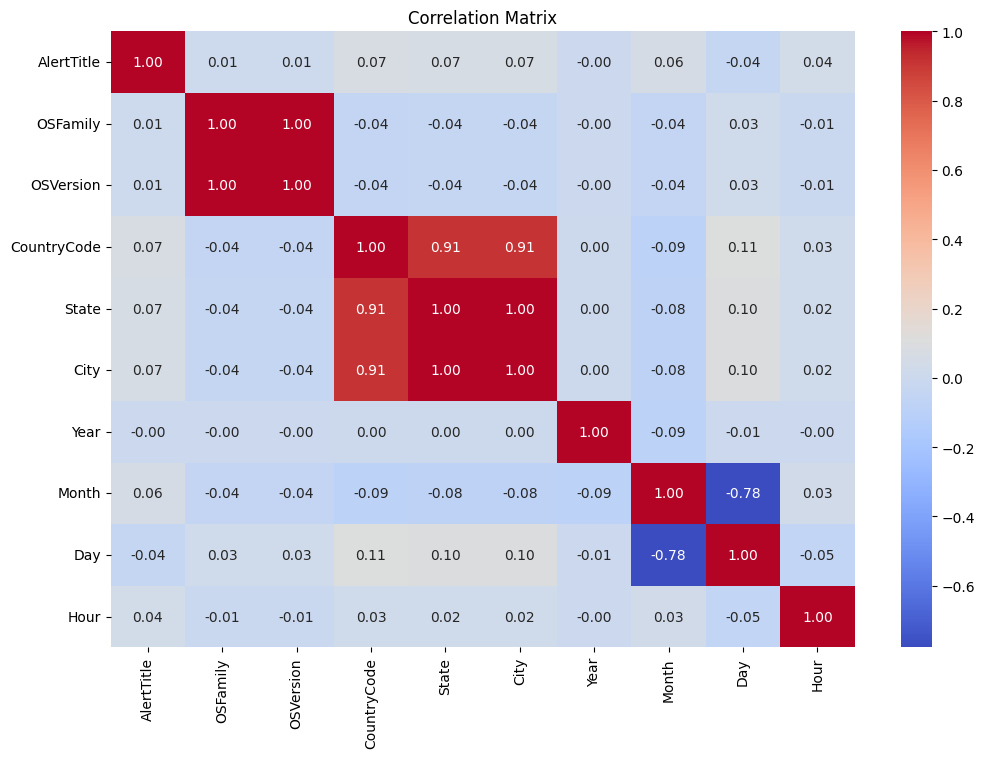

In [18]:
df_numeric = train_data.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()

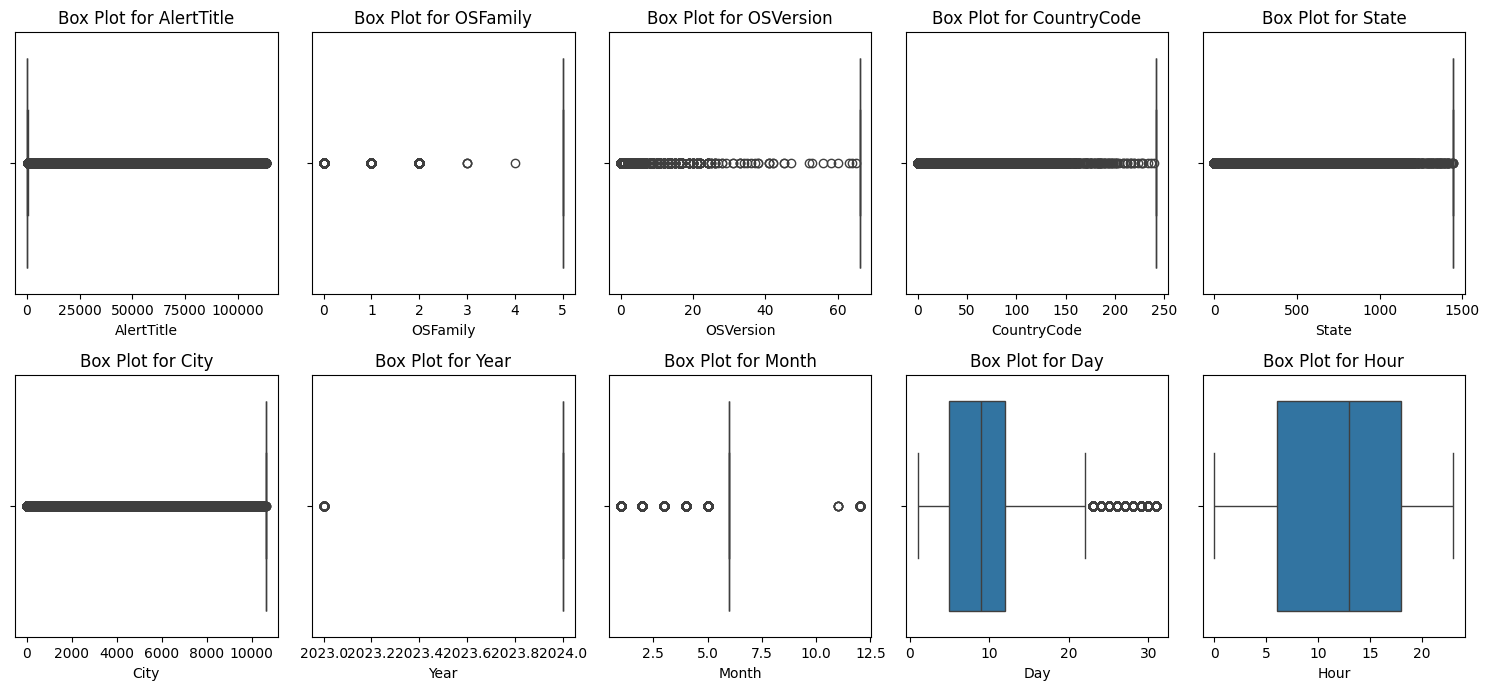

In [19]:
numeric_columns = train_data.select_dtypes(include=['int32', 'int64']).columns

# Create box plots for each numeric column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 5, i)  # Arrange plots in a grid
    sns.boxplot(data=train_data, x=column)
    plt.title(f'Box Plot for {column}')
    plt.tight_layout()

plt.show()


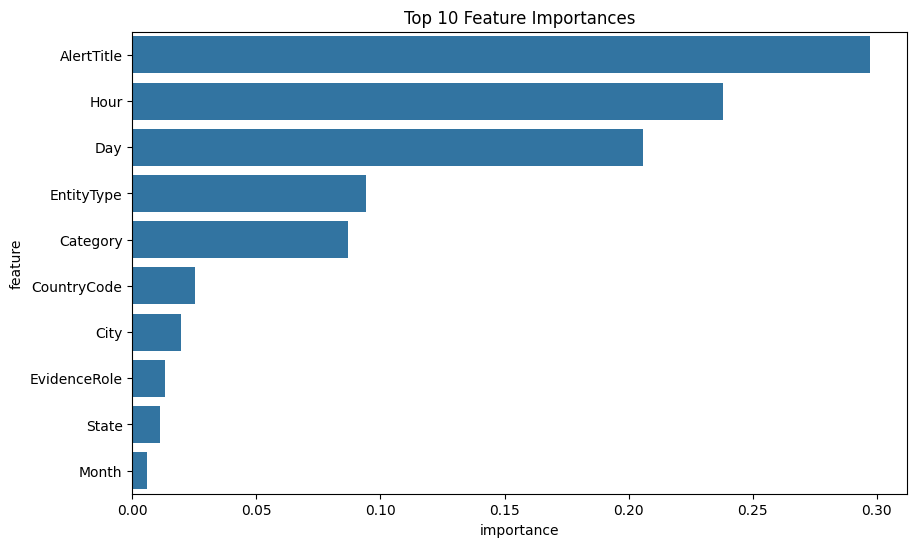

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Assuming train_data is your DataFrame and id_columns contains the ID column names
train_sample = train_data.sample(frac=0.001, random_state=42)

# Drop ID columns and the target variable 'IncidentGrade'
X = train_sample.drop( ['IncidentGrade'], axis=1)
y = train_sample['IncidentGrade']

# Encoding non-numeric columns using LabelEncoder
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)

# Extract feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 14 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   AlertTitle     int64 
 1   Category       object
 2   IncidentGrade  object
 3   EntityType     object
 4   EvidenceRole   object
 5   OSFamily       int64 
 6   OSVersion      int64 
 7   CountryCode    int64 
 8   State          int64 
 9   City           int64 
 10  Year           int32 
 11  Month          int32 
 12  Day            int32 
 13  Hour           int32 
dtypes: int32(4), int64(6), object(4)
memory usage: 435.6+ MB


In [21]:
train_data=train_data.drop(['OSFamily','OSVersion'],axis=1)

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 12 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   AlertTitle     int64 
 1   Category       object
 2   IncidentGrade  object
 3   EntityType     object
 4   EvidenceRole   object
 5   CountryCode    int64 
 6   State          int64 
 7   City           int64 
 8   Year           int32 
 9   Month          int32 
 10  Day            int32 
 11  Hour           int32 
dtypes: int32(4), int64(4), object(4)
memory usage: 363.0+ MB


In [23]:
numeric_columns = train_data.select_dtypes(include=['int32', 'int64']).columns

for col in numeric_columns:
    if train_data[col].nunique() > 10:  # Only process columns with more than 10 unique values
        # Calculate IQR and bounds
        Q1 = train_data[col].quantile(0.25)
        Q3 = train_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove rows with outliers
        train_data = train_data[(train_data[col] >= lower_bound) & (train_data[col] <= upper_bound)]

# Display the shape of the cleaned DataFrame
print(f"DataFrame shape after removing outliers: {train_data.shape}")

DataFrame shape after removing outliers: (3290438, 12)


In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3290438 entries, 1 to 4758417
Data columns (total 12 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   AlertTitle     int64 
 1   Category       object
 2   IncidentGrade  object
 3   EntityType     object
 4   EvidenceRole   object
 5   CountryCode    int64 
 6   State          int64 
 7   City           int64 
 8   Year           int32 
 9   Month          int32 
 10  Day            int32 
 11  Hour           int32 
dtypes: int32(4), int64(4), object(4)
memory usage: 276.1+ MB


In [25]:
train_data.head()

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,CountryCode,State,City,Year,Month,Day,Hour
1,25,Impact,BenignPositive,Machine,Impacted,242,1445,10630,2024,6,3,10
2,444,Execution,BenignPositive,Machine,Impacted,242,1445,10630,2024,6,13,3
6,0,InitialAccess,TruePositive,CloudLogonSession,Related,242,1445,10630,2024,6,5,15
7,4,SuspiciousActivity,TruePositive,Ip,Related,242,1445,10630,2024,6,10,20
11,0,InitialAccess,TruePositive,CloudLogonRequest,Related,242,1445,10630,2024,6,13,21


In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3290438 entries, 1 to 4758417
Data columns (total 12 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   AlertTitle     int64 
 1   Category       object
 2   IncidentGrade  object
 3   EntityType     object
 4   EvidenceRole   object
 5   CountryCode    int64 
 6   State          int64 
 7   City           int64 
 8   Year           int32 
 9   Month          int32 
 10  Day            int32 
 11  Hour           int32 
dtypes: int32(4), int64(4), object(4)
memory usage: 276.1+ MB


Encoding Categorical Variables:

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder_incident = LabelEncoder()
label_encoder_evidence = LabelEncoder()


train_data['IncidentGrade'] = label_encoder_incident.fit_transform(train_data['IncidentGrade'])
train_data['EvidenceRole'] = label_encoder_evidence.fit_transform(train_data['EvidenceRole'])


In [29]:
train_data['Category'].value_counts()

Category
InitialAccess         1698077
SuspiciousActivity     426305
CommandAndControl      374043
Exfiltration           230220
Impact                 190152
CredentialAccess       115946
Execution              113234
Discovery               50853
Malware                 33597
Persistence             23626
LateralMovement         12868
DefenseEvasion          10636
UnwantedSoftware         4992
Collection               3531
Ransomware               2358
Name: count, dtype: int64

In [30]:
top_categories = train_data['Category'].value_counts().nlargest(3).index

train_data['Category'] = train_data['Category'].apply(lambda x: x if x in top_categories else 'Others')


In [31]:
train_data['Category'].value_counts()

Category
InitialAccess         1698077
Others                 792013
SuspiciousActivity     426305
CommandAndControl      374043
Name: count, dtype: int64

In [32]:
train_data['EntityType'].value_counts()

EntityType
User                    786393
Ip                      434350
MailMessage             364865
CloudLogonRequest       318164
Url                     315996
Mailbox                 228482
Machine                 222645
File                    156218
Process                 149641
MailCluster             111384
CloudLogonSession       106163
CloudApplication         82706
RegistryValue             4206
RegistryKey               2967
AzureResource             2742
Malware                   1010
GenericEntity              997
SecurityGroup              595
OAuthApplication           580
BlobContainer              123
Blob                       111
MailboxConfiguration       100
Name: count, dtype: int64

In [33]:
top_categories_1 = train_data['EntityType'].value_counts().nlargest(3).index

# Replace categories not in the top 3 with "Others"
train_data['EntityType'] = train_data['EntityType'].apply(lambda x: x if x in top_categories_1 else 'Others')

In [34]:
train_data['EntityType'].value_counts()

EntityType
Others         1704830
User            786393
Ip              434350
MailMessage     364865
Name: count, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

train_data['Category'] = le1.fit_transform(train_data['Category'])
train_data['EntityType'] = le2.fit_transform(train_data['EntityType'])


In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3290438 entries, 1 to 4758417
Data columns (total 12 columns):
 #   Column         Dtype
---  ------         -----
 0   AlertTitle     int64
 1   Category       int64
 2   IncidentGrade  int64
 3   EntityType     int64
 4   EvidenceRole   int64
 5   CountryCode    int64
 6   State          int64
 7   City           int64
 8   Year           int32
 9   Month          int32
 10  Day            int32
 11  Hour           int32
dtypes: int32(4), int64(8)
memory usage: 276.1 MB


In [37]:
print("Missing values:\n", train_data.isnull().sum())

# Check for inf/-inf values
print("Infinite values:\n", np.isinf(train_data).sum())

Missing values:
 AlertTitle       0
Category         0
IncidentGrade    0
EntityType       0
EvidenceRole     0
CountryCode      0
State            0
City             0
Year             0
Month            0
Day              0
Hour             0
dtype: int64
Infinite values:
 AlertTitle       0
Category         0
IncidentGrade    0
EntityType       0
EvidenceRole     0
CountryCode      0
State            0
City             0
Year             0
Month            0
Day              0
Hour             0
dtype: int64


In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3290438 entries, 1 to 4758417
Data columns (total 12 columns):
 #   Column         Dtype
---  ------         -----
 0   AlertTitle     int64
 1   Category       int64
 2   IncidentGrade  int64
 3   EntityType     int64
 4   EvidenceRole   int64
 5   CountryCode    int64
 6   State          int64
 7   City           int64
 8   Year           int32
 9   Month          int32
 10  Day            int32
 11  Hour           int32
dtypes: int32(4), int64(8)
memory usage: 276.1 MB


In [39]:
train_data['IncidentGrade'].value_counts()

IncidentGrade
0    1452692
2    1190887
1     646859
Name: count, dtype: int64

Model Selection and Training:


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

Handling Class Imbalance:

In [41]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

X = train_data.drop(columns=["IncidentGrade"])
y = train_data["IncidentGrade"]

ros = RandomOverSampler(sampling_strategy='auto', random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [42]:
print(y_resampled.value_counts())

IncidentGrade
0    1452692
2    1452692
1    1452692
Name: count, dtype: int64


Data Splitting:

In [43]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Verify the class distribution in the training and testing sets
print(f"Train class distribution: \n{y_train.value_counts()}")
print(f"Test class distribution: \n{y_test.value_counts()}")


Train class distribution: 
IncidentGrade
0    1162154
2    1162153
1    1162153
Name: count, dtype: int64
Test class distribution: 
IncidentGrade
1    290539
2    290539
0    290538
Name: count, dtype: int64


DecisionTreeClassifier

In [44]:
# Initialize the DecisionTreeClassifier with chosen hyperparameters
dtree = DecisionTreeClassifier(
    criterion='gini',      
    max_depth=10,          
    min_samples_split=5,  
    min_samples_leaf=2,   
    random_state=42
)

# Train the model
dtree.fit(X_train, y_train)

# Predict on the test set
y_pred = dtree.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Validation Accuracy: {accuracy_score(y_test, y_pred):.4f}")




Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63    290538
           1       0.59      0.67      0.63    290539
           2       0.75      0.60      0.67    290539

    accuracy                           0.64    871616
   macro avg       0.65      0.64      0.64    871616
weighted avg       0.65      0.64      0.64    871616

Confusion Matrix:
[[189732  82794  18012]
 [ 54835 195855  39849]
 [ 65827  50796 173916]]
Validation Accuracy: 0.6419


RandomForestClassifier

In [45]:

randomforest = RandomForestClassifier(
    n_estimators=200,       
    max_depth=20,          
    min_samples_split=5,   
    min_samples_leaf=2,    
    max_features='sqrt',   
    bootstrap=True,         
    random_state=42         
)

# Train the model
print("Training RandomForestClassifier...")
randomforest.fit(X_train, y_train)

# Predict on the test set
y_pred = randomforest.predict(X_test)

# Evaluate the model
print("\nValidation Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Training RandomForestClassifier...

Validation Results:
Accuracy: 0.7484

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76    290538
           1       0.80      0.69      0.74    290539
           2       0.78      0.71      0.74    290539

    accuracy                           0.75    871616
   macro avg       0.76      0.75      0.75    871616
weighted avg       0.76      0.75      0.75    871616

Confusion Matrix:
[[244802  25357  20379]
 [ 50426 200391  39722]
 [ 58100  25338 207101]]


XGBClassifier

In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize XGBClassifier with chosen hyperparameters
xgb_model = XGBClassifier(
    n_estimators=200,          
    learning_rate=0.1,         
    max_depth=6,              
    subsample=0.8,             
    colsample_bytree=0.8,     
    random_state=42,          
    use_label_encoder=False,  
    eval_metric='logloss'      
)

# Train the model
print("Training XGBClassifier...")
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("\nValidation Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Training XGBClassifier...


c:\Users\Shiva\OneDrive\Desktop\cardekho\car_price_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:36:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Validation Results:
Accuracy: 0.7113

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.81      0.72    290538
           1       0.73      0.65      0.69    290539
           2       0.77      0.67      0.72    290539

    accuracy                           0.71    871616
   macro avg       0.72      0.71      0.71    871616
weighted avg       0.72      0.71      0.71    871616

Confusion Matrix:
[[235584  37411  17543]
 [ 59706 189922  40911]
 [ 64934  31087 194518]]


In [47]:
test_data=pd.read_csv(r"C:\Users\Shiva\OneDrive\Desktop\microsoft_classification\GUIDE_Test.csv",low_memory=False)

Data Preprocessing: FOR TEST DATA

In [48]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [49]:
test_data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [50]:
test_data.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [51]:
test_data.count()

Id                    4147992
OrgId                 4147992
IncidentId            4147992
AlertId               4147992
Timestamp             4147992
DetectorId            4147992
AlertTitle            4147992
Category              4147992
MitreTechniques       1840888
IncidentGrade         4147992
ActionGrouped            1913
ActionGranular           1913
EntityType            4147992
EvidenceRole          4147992
DeviceId              4147992
Sha256                4147992
IpAddress             4147992
Url                   4147992
AccountSid            4147992
AccountUpn            4147992
AccountObjectId       4147992
AccountName           4147992
DeviceName            4147992
NetworkMessageId      4147992
EmailClusterId          41707
RegistryKey           4147992
RegistryValueName     4147992
RegistryValueData     4147992
ApplicationId         4147992
ApplicationName       4147992
OAuthApplicationId    4147992
ThreatFamily            31378
FileName              4147992
FolderPath

In [52]:
test_data.drop(columns=['MitreTechniques', 'ActionGrouped', 'ActionGranular', 'EmailClusterId', 
                       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict'], 
               axis=1, inplace=True)

In [53]:
test_data.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
dtype: int64

In [54]:
test_data['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    1752940
TruePositive      1492354
FalsePositive      902698
Name: count, dtype: int64

In [55]:
test_data.duplicated().sum()

np.int64(225297)

In [56]:
test_data.drop_duplicates()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,BenignPositive,User,...,881,289573,117668,3586,5,66,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,BenignPositive,Machine,...,881,289573,117668,3586,0,0,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,BenignPositive,Process,...,881,14,22,3586,5,66,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,FalsePositive,CloudLogonSession,...,881,289573,117668,3586,5,66,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,BenignPositive,User,...,881,289573,117668,3586,5,66,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147985,171798692464,42,391,638112,2024-06-03T20:24:41.000Z,135,7322,Malware,BenignPositive,Machine,...,881,289573,117668,3586,0,0,242,1445,10630,Public
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,BenignPositive,User,...,881,289573,117668,3586,5,66,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,BenignPositive,User,...,881,289573,117668,3586,5,66,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,FalsePositive,Ip,...,881,289573,117668,3586,5,66,242,1445,10630,Public


In [57]:
test_data['Timestamp']=pd.to_datetime(test_data['Timestamp'])
test_data['Year'] = test_data['Timestamp'].dt.year
test_data['Month'] = test_data['Timestamp'].dt.month
test_data['Day'] = test_data['Timestamp'].dt.day
test_data['Hour'] = test_data['Timestamp'].dt.hour

In [58]:
identifier_cols_1 = [
    'Id', 'OrgId', 'IncidentId', 'AlertId', 'DeviceId', 
    'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountObjectId', 
    'AccountUpn', 'AccountName', 'DeviceName', 'NetworkMessageId', 'RegistryKey','Timestamp','Usage',
    'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'OAuthApplicationId','DetectorId','FileName', 'FolderPath', 'ResourceIdName','ApplicationName'
]

# Remove these columns
test_data.drop(columns=identifier_cols_1, inplace=True)

In [59]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 14 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   AlertTitle     int64 
 1   Category       object
 2   IncidentGrade  object
 3   EntityType     object
 4   EvidenceRole   object
 5   OSFamily       int64 
 6   OSVersion      int64 
 7   CountryCode    int64 
 8   State          int64 
 9   City           int64 
 10  Year           int32 
 11  Month          int32 
 12  Day            int32 
 13  Hour           int32 
dtypes: int32(4), int64(6), object(4)
memory usage: 379.8+ MB


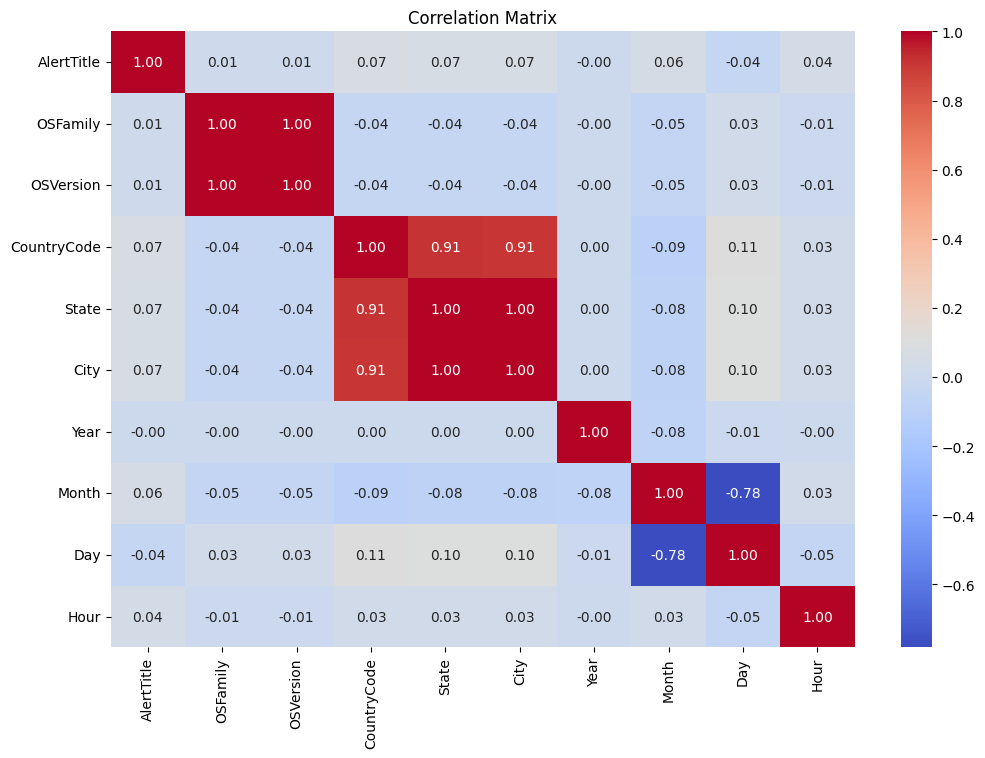

In [60]:
dt_numeric = test_data.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation_matrix = dt_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()

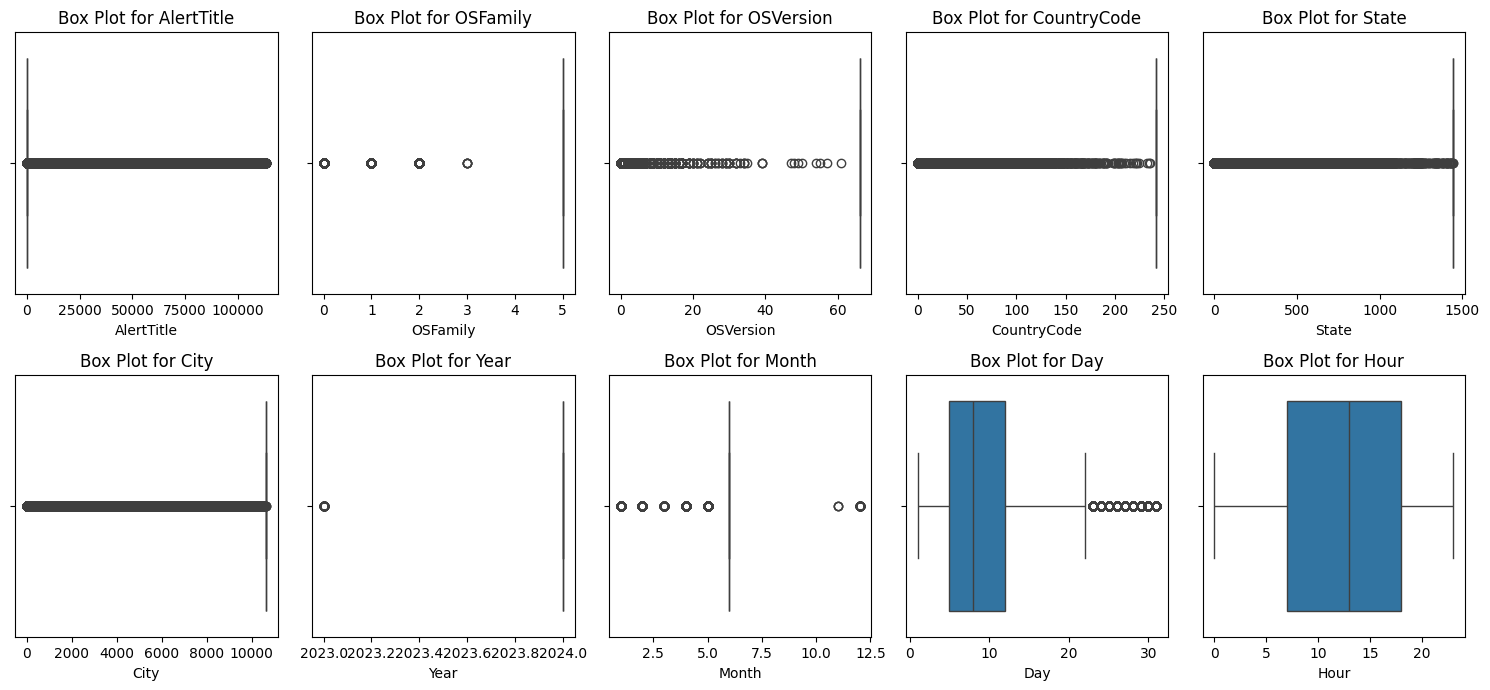

In [61]:
numeric_columns_1 = test_data.select_dtypes(include=['int32', 'int64', 'int8']).columns

# Create box plots for each numeric column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns_1, 1):
    plt.subplot(3, 5, i)  # Arrange plots in a grid
    sns.boxplot(data=test_data, x=column)
    plt.title(f'Box Plot for {column}')
    plt.tight_layout()

plt.show()

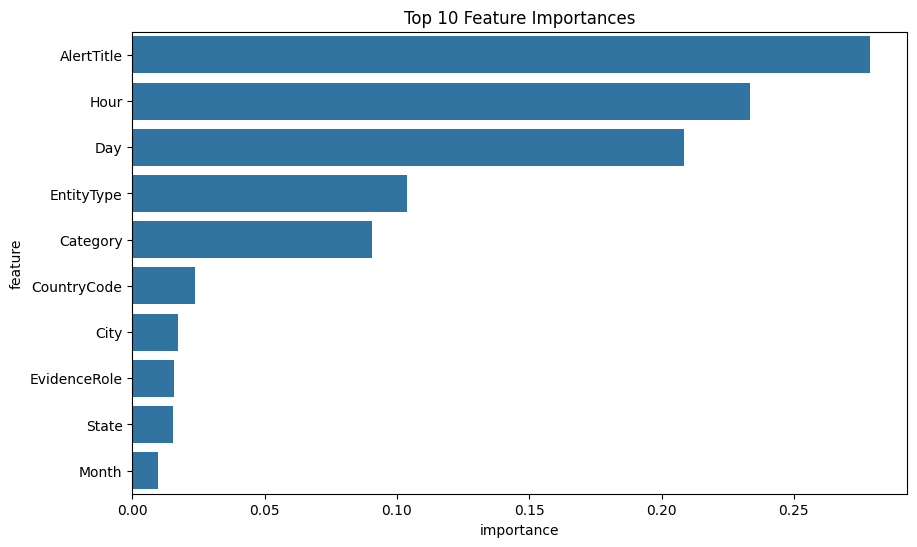

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Assuming train_data is your DataFrame and id_columns contains the ID column names
train_sample_1 = test_data.sample(frac=0.001, random_state=42)

# Drop ID columns and the target variable 'IncidentGrade'
X = train_sample_1.drop( ['IncidentGrade'], axis=1)
y = train_sample_1['IncidentGrade']

# Encoding non-numeric columns using LabelEncoder
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Random Forest model
rf = RandomForestClassifier()
rf.fit(X, y)

# Extract feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

In [62]:
test_data=test_data.drop(['OSFamily','OSVersion'],axis=1)

In [63]:
numeric_columns = test_data.select_dtypes(include=['int32', 'int64']).columns

for col in numeric_columns:
    if test_data[col].nunique() > 10:  
        # Calculate IQR and bounds
        Q1 = test_data[col].quantile(0.25)
        Q3 = test_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove rows with outliers
        test_data = test_data[(test_data[col] >= lower_bound) & (test_data[col] <= upper_bound)]

# Display the shape of the cleaned DataFrame
print(f"DataFrame shape after removing outliers: {test_data.shape}")

DataFrame shape after removing outliers: (2845986, 12)


In [64]:
from sklearn.preprocessing import LabelEncoder


encoder_incident = LabelEncoder()
encoder_evidence = LabelEncoder()


test_data['IncidentGrade'] = encoder_incident.fit_transform(test_data['IncidentGrade'])
test_data['EvidenceRole'] = encoder_evidence.fit_transform(test_data['EvidenceRole'])

In [65]:
top_categories = test_data['Category'].value_counts().nlargest(3).index

# Replace categories not in the top 3 with "Others"
test_data['Category'] = test_data['Category'].apply(lambda x: x if x in top_categories else 'Others')

In [66]:
top_categories_2 = test_data['EntityType'].value_counts().nlargest(3).index

# Replace categories not in the top 3 with "Others"
test_data['EntityType'] = test_data['EntityType'].apply(lambda x: x if x in top_categories_2 else 'Others')

In [67]:
print(test_data.columns)


Index(['AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'CountryCode', 'State', 'City', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


In [68]:
test_data

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,CountryCode,State,City,Year,Month,Day,Hour
1,2,CommandAndControl,0,Others,0,242,1445,10630,2024,6,3,12
3,0,InitialAccess,1,Others,1,242,1445,10630,2024,6,12,12
4,18,Others,0,User,0,242,1445,10630,2024,6,6,17
5,0,InitialAccess,2,User,0,242,1445,10630,2024,6,6,8
6,4,SuspiciousActivity,0,Others,0,242,1445,10630,2024,6,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,120,InitialAccess,0,User,0,242,1445,10630,2024,6,4,3
4147988,196,InitialAccess,0,User,0,242,1445,10630,2024,6,4,19
4147989,29,CommandAndControl,1,Ip,1,242,1445,10630,2024,6,15,0
4147990,1,InitialAccess,0,Others,0,242,1445,10630,2024,6,11,16


In [69]:
from sklearn.preprocessing import LabelEncoder

encoder_Category = LabelEncoder()
encoder_EntityType = LabelEncoder()

test_data['Category'] = encoder_Category.fit_transform(test_data['Category'])
test_data['EntityType'] = encoder_EntityType.fit_transform(test_data['EntityType'])


In [70]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2845986 entries, 1 to 4147991
Data columns (total 12 columns):
 #   Column         Dtype
---  ------         -----
 0   AlertTitle     int64
 1   Category       int64
 2   IncidentGrade  int64
 3   EntityType     int64
 4   EvidenceRole   int64
 5   CountryCode    int64
 6   State          int64
 7   City           int64
 8   Year           int32
 9   Month          int32
 10  Day            int32
 11  Hour           int32
dtypes: int32(4), int64(8)
memory usage: 238.8 MB


In [71]:
test_data

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,CountryCode,State,City,Year,Month,Day,Hour
1,2,0,0,2,0,242,1445,10630,2024,6,3,12
3,0,1,1,2,1,242,1445,10630,2024,6,12,12
4,18,2,0,3,0,242,1445,10630,2024,6,6,17
5,0,1,2,3,0,242,1445,10630,2024,6,6,8
6,4,3,0,2,0,242,1445,10630,2024,6,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,120,1,0,3,0,242,1445,10630,2024,6,4,3
4147988,196,1,0,3,0,242,1445,10630,2024,6,4,19
4147989,29,0,1,0,1,242,1445,10630,2024,6,15,0
4147990,1,1,0,2,0,242,1445,10630,2024,6,11,16


In [72]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2845986 entries, 1 to 4147991
Data columns (total 12 columns):
 #   Column         Dtype
---  ------         -----
 0   AlertTitle     int64
 1   Category       int64
 2   IncidentGrade  int64
 3   EntityType     int64
 4   EvidenceRole   int64
 5   CountryCode    int64
 6   State          int64
 7   City           int64
 8   Year           int32
 9   Month          int32
 10  Day            int32
 11  Hour           int32
dtypes: int32(4), int64(8)
memory usage: 238.8 MB


In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3290438 entries, 1 to 4758417
Data columns (total 12 columns):
 #   Column         Dtype
---  ------         -----
 0   AlertTitle     int64
 1   Category       int64
 2   IncidentGrade  int64
 3   EntityType     int64
 4   EvidenceRole   int64
 5   CountryCode    int64
 6   State          int64
 7   City           int64
 8   Year           int32
 9   Month          int32
 10  Day            int32
 11  Hour           int32
dtypes: int32(4), int64(8)
memory usage: 276.1 MB


Final Evaluation on Test Set:

In [74]:
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, accuracy_score



# Separate features and target from the new test dataset
X_new_test = test_data.drop(columns=["IncidentGrade"])  # Drop the target column
y_new_test = test_data["IncidentGrade"]  # Extract the target column

# Ensure the new test dataset has the same features as the training data
X_new_test = X_new_test[X_train.columns]  # Align columns with the trained model

# Predict on the new test dataset
print("Predicting on new test data...")
y_new_pred = randomforest.predict(X_new_test)

# Calculate performance metrics on the new test dataset
macro_f1_new = f1_score(y_new_test, y_new_pred, average="macro")
precision_new = precision_score(y_new_test, y_new_pred, average="macro")
recall_new = recall_score(y_new_test, y_new_pred, average="macro")

# Print the metrics
print("\nNew Test Data Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_new_test, y_new_pred):.4f}")
print(f"Macro F1 Score: {macro_f1_new:.4f}")
print(f"Precision: {precision_new:.4f}")
print(f"Recall: {recall_new:.4f}")

# Optionally, display the full classification report
print("\nClassification Report:")
print(classification_report(y_new_test, y_new_pred))

Predicting on new test data...

New Test Data Performance Metrics:
Accuracy: 0.7162
Macro F1 Score: 0.6929
Precision: 0.6976
Recall: 0.6923

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.76   1216679
           1       0.58      0.59      0.58    563919
           2       0.79      0.68      0.73   1065388

    accuracy                           0.72   2845986
   macro avg       0.70      0.69      0.69   2845986
weighted avg       0.72      0.72      0.72   2845986



Feature Importance


Top 10 Important Features:
         Feature  Importance
0     AlertTitle    0.549999
9            Day    0.172677
1       Category    0.099374
10          Hour    0.092203
2     EntityType    0.056858
3   EvidenceRole    0.019134
8          Month    0.009742
7           Year    0.000009
5          State    0.000004
6           City    0.000000


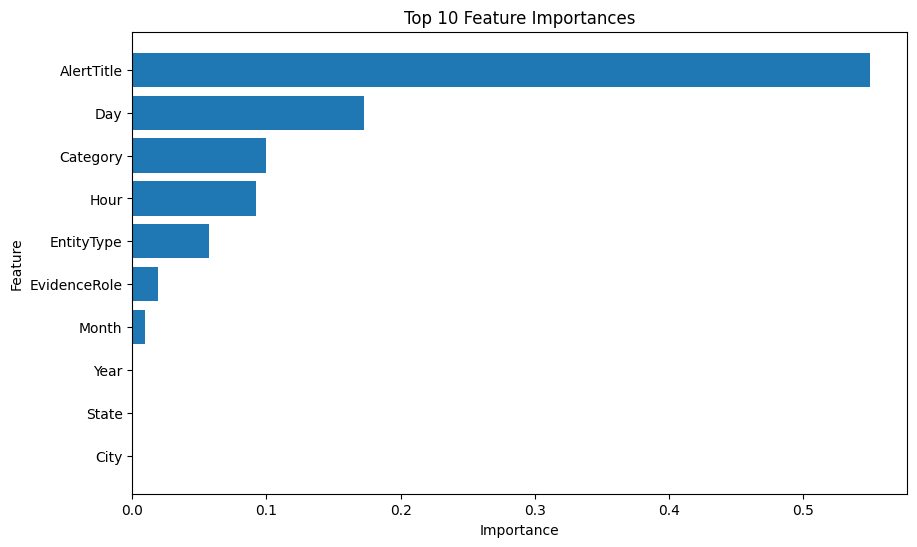

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained RandomForest model
importances = randomforest.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display the top features
print("\nTop 10 Important Features:")
print(feature_importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"].head(10), feature_importance_df["Importance"].head(10))
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.show()


In [4]:
import gc
gc.collect()

0